IMPORTING NESSECARY LIBRARIES AND MODULES

In [33]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report


Loading File

In [3]:
from google.colab import files

uploaded = files.upload()

Saving fraudTrain.xlsx to fraudTrain.xlsx


In [4]:
df = pd.read_excel("fraudTrain.xlsx")
df.to_csv("data.csv", index=False)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652090,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Exploratory Data Analysis (EDA) AND PREPROCESSING

In [5]:
df.describe(include='object')

,merchant,category,first,last,gender,street,city,state,job,trans_num
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,693,14,348,479,2,965,879,51,493,1048575
top,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,4664 Sanchez Common Suite 930,Birmingham,TX,Film/video editor,8d0a575fe635bbde12f1a2bffc126731
freq,3521,106430,21518,23394,573968,2566,4499,76731,7940,1


In [6]:
df.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,2019-08-14 03:47:51.826506496,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1973-09-23 10:23:35.157141776,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
min,0.000000e+00,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2.621435e+05,2019-05-10 20:39:13,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,5.242870e+05,2019-08-13 23:45:21,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1975-10-11 00:00:00,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,7.864305e+05,2019-12-01 12:46:52,4.642255e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-14 00:00:00,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,1.048574e+06,2020-03-10 16:08:50,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00
std,3.026977e+05,NaN,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,NaN,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02


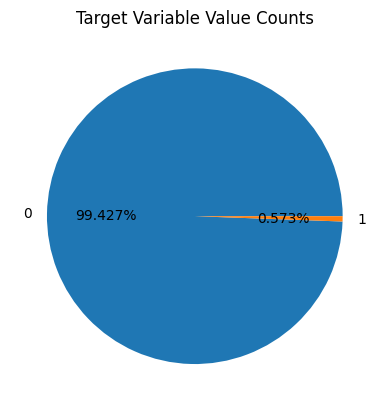

In [7]:
labels = df.is_fraud.unique()

# get the count of each class
sizes = df.is_fraud.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1048575 non-null  int64         
 1   trans_date_trans_time  1048575 non-null  datetime64[ns]
 2   cc_num                 1048575 non-null  int64         
 3   merchant               1048575 non-null  object        
 4   category               1048575 non-null  object        
 5   amt                    1048575 non-null  float64       
 6   first                  1048575 non-null  object        
 7   last                   1048575 non-null  object        
 8   gender                 1048575 non-null  object        
 9   street                 1048575 non-null  object        
 10  city                   1048575 non-null  object        
 11  state                  1048575 non-null  object        
 12  zip                    10485

In [9]:
df['trans_num'].apply(type).value_counts()  #trans_num contain one int value, all other features are string

,count
trans_num,
<class 'str'>,1048574
<class 'int'>,1


In [10]:
label_encoder = LabelEncoder()
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])
df['job'] = label_encoder.fit_transform(df['job'])
df['trans_num']= label_encoder.fit_transform(df['trans_num'].astype(str))
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652090,514,8,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,370,1988-03-09,45701,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,428,1978-06-21,128847,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,307,1962-01-19,662104,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,328,1967-01-12,440259,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,116,1986-03-28,672104,1325376186,38.674999,-78.632459,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1048575 non-null  int64         
 1   trans_date_trans_time  1048575 non-null  datetime64[ns]
 2   cc_num                 1048575 non-null  int64         
 3   merchant               1048575 non-null  int64         
 4   category               1048575 non-null  int64         
 5   amt                    1048575 non-null  float64       
 6   first                  1048575 non-null  object        
 7   last                   1048575 non-null  object        
 8   gender                 1048575 non-null  int64         
 9   street                 1048575 non-null  object        
 10  city                   1048575 non-null  int64         
 11  state                  1048575 non-null  int64         
 12  zip                    10485

In [12]:
df = df.drop(columns=['first', 'last', 'street'])

<Axes: >

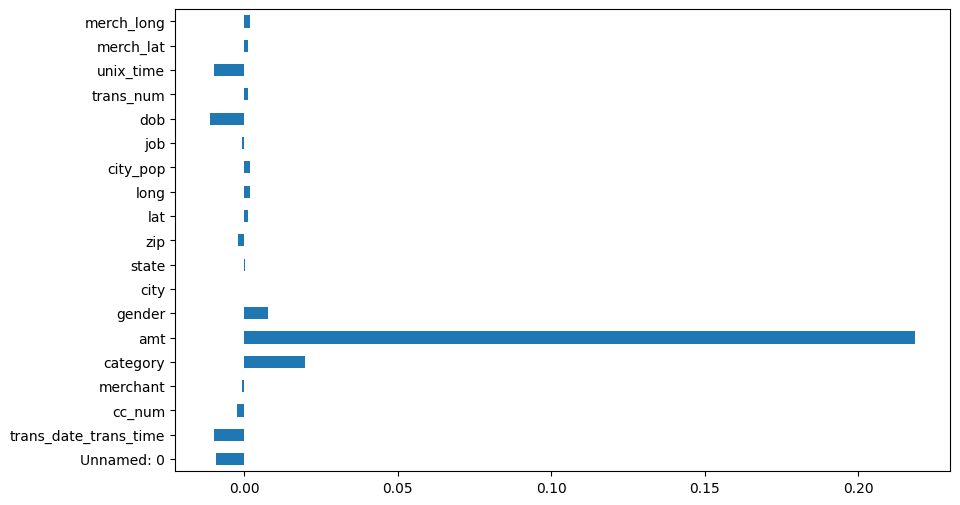

In [13]:
df.corr()['is_fraud'].drop('is_fraud').plot(kind='barh', figsize=(10, 6))

In [ ]:
df = df.drop(columns=['merch_long','merch_lat','trans_num','job','city_pop','long','lat','zip','state','city','merchant','cc_num'])

In [25]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

df['age'] = ((df['trans_date_trans_time'] - df['dob']).dt.days // 365)
df['hour'] = df['trans_date_trans_time'].dt.hour
df['dayofweek'] = df['trans_date_trans_time'].dt.dayofweek

df.drop(columns=['dob', 'trans_date_trans_time'], inplace=True)



In [26]:
df.head()

,Unnamed: 0,category,amt,gender,unix_time,is_fraud,age,hour,dayofweek
0,0,8,4.97,0,1325376018,0,30,0,1
1,1,4,107.23,0,1325376044,0,40,0,1
2,2,0,220.11,1,1325376051,0,56,0,1
3,3,2,45.00,1,1325376076,0,52,0,1
4,4,9,41.96,1,1325376186,0,32,0,1


MODEL TRAINING

In [27]:
X = df.drop('is_fraud',axis=1)
y= df['is_fraud']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [29]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [34]:
y_pred = rf.predict(X_test)
print("accuracy :", metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

accuracy : 0.9929332665760675
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    208514
           1       0.44      0.89      0.59      1201

    accuracy                           0.99    209715
   macro avg       0.72      0.94      0.79    209715
weighted avg       1.00      0.99      0.99    209715



NOW WE WILL APPLY OUR MODEL ON TESTING DATASET

In [35]:
uploaded = files.upload()

Saving fraudTest.xlsx to fraudTest.xlsx


In [36]:
df = pd.read_excel("fraudTrain.xlsx")
df.to_csv("data.csv", index=False)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652090,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


PREPROCESSING

In [37]:
label_encoder = LabelEncoder()
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])
df['job'] = label_encoder.fit_transform(df['job'])
df['trans_num']= label_encoder.fit_transform(df['trans_num'].astype(str))
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652090,514,8,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,370,1988-03-09,45701,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,428,1978-06-21,128847,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,307,1962-01-19,662104,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,328,1967-01-12,440259,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,116,1986-03-28,672104,1325376186,38.674999,-78.632459,0


In [38]:
df = df.drop(columns=['first', 'last', 'street','merch_long','merch_lat','trans_num','job','city_pop','long','lat','zip','state','city','merchant','cc_num'])

In [39]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

df['age'] = ((df['trans_date_trans_time'] - df['dob']).dt.days // 365)
df['hour'] = df['trans_date_trans_time'].dt.hour
df['dayofweek'] = df['trans_date_trans_time'].dt.dayofweek

df.drop(columns=['dob', 'trans_date_trans_time'], inplace=True)

MODEL IMPLEMENTATION

In [40]:
X_doc = df.drop('is_fraud',axis=1)
y_doc = df['is_fraud']

In [41]:
y_new = rf.predict(X_doc)
print(classification_report(y_doc, y_new))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1042569
           1       0.47      0.96      0.63      6006

    accuracy                           0.99   1048575
   macro avg       0.74      0.98      0.81   1048575
weighted avg       1.00      0.99      0.99   1048575

